In [1]:
import os
# Directory with our training dandelion pictures
train_nearField_dir = os.path.join('/home/vlad/Desktop/train/Near_Field')

# Directory with our training grass pictures
train_farField_dir = os.path.join('/home/vlad/Desktop/train/Far_Field')

# Directory with our validation dandelion pictures
valid_nearField_dir = os.path.join('/home/vlad/Desktop/valid/Near_Field')

# Directory with our validation grass pictures
valid_farField_dir = os.path.join('/home/vlad/Desktop/valid/Far_Field')

In [2]:
train_nearField_names = os.listdir(train_nearField_dir)
print(train_nearField_names[:10])

train_farField_names = os.listdir(train_farField_dir)
print(train_farField_names[:10])

validation_nearField_names = os.listdir(valid_nearField_dir)
print(validation_nearField_names[:10])

validation_farField_names = os.listdir(valid_farField_dir)
print(validation_farField_names[:10])

['BTW1_2021-08-20 13:26:30.904.png', 'B12_2021-08-20 09:55:01.676.png', 'BTW1_2021-08-20 14:41:13.542.png', 'A12_2021-08-20 11:33:24.246.png', 'BTW1_2021-08-20 14:12:11.397.png', 'FE2_S1_2021-08-20 10:37:02.118.png', 'B12_2021-08-20 10:17:42.25.png', 'B12_2021-08-20 11:41:24.165.png', 'ATW1_2021-08-20 13:27:19.85.png', 'FE2_S1_2021-08-20 12:42:42.494.png']
['BTW2_2021-08-20 13:40:13.505.png', 'FE2_CP_2021-08-20 10:53:04.319.png', 'B11_2021-08-20 14:06:24.931.png', 'B11_2021-08-20 09:28:58.033.png', 'BTW2_2021-08-20 14:28:34.901.png', 'FE2_CP_2021-08-20 10:57:24.219.png', 'BTW2_2021-08-20 15:25:57.png', 'BTW2_2021-08-20 12:20:52.572.png', 'FE2_CP_2021-08-20 14:03:47.520.png', 'BTW2_2021-08-20 15:17:36.901.png']
['BTW1_2021-08-20 16:41:53.569.png', 'FE2_S1_2021-08-20 15:34:45.141.png', 'FE2_S1_2021-08-20 17:39:45.476.png', 'ATW1_2021-08-20 16:11:51.752.png', 'B12_2021-08-20 16:45:19.30.png', 'A12_2021-08-20 17:14:07.000.png', 'ATW1_2021-08-20 16:00:31.381.png', 'ATW1_2021-08-20 17:34:59.

In [3]:
print('total training nearField images:', len(os.listdir(train_nearField_dir)))
print('total training farField images:', len(os.listdir(train_farField_dir)))
print('total validation nearField images:', len(os.listdir(valid_nearField_dir)))
print('total validation farField images:', len(os.listdir(valid_farField_dir)))

total training nearField images: 4824
total training farField images: 3931
total validation nearField images: 2412
total validation farField images: 1965


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

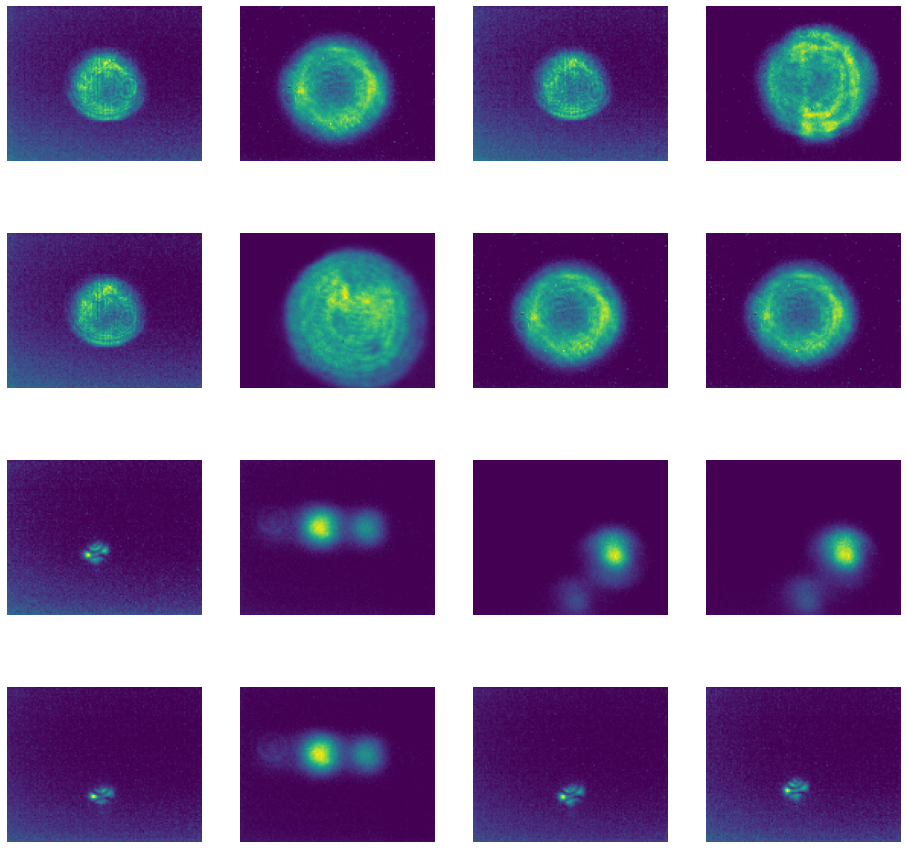

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_nearField_pic = [os.path.join(train_nearField_dir, fname) 
                for fname in train_nearField_names[pic_index-8:pic_index]]
next_farField_pic = [os.path.join(train_farField_dir, fname) 
                for fname in train_farField_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_nearField_pic + next_farField_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will not be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=None)
validation_datagen = ImageDataGenerator(rescale=None)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/home/vlad/Desktop/train/',  # This is the source directory for training images
        classes = ['Near_Field', 'Far_Field'],
        target_size=(200, 200), # All images will be resized to 200x200
        color_mode="grayscale",
        batch_size=200,
        # Use binary labels
        class_mode='binary',
        shuffle=True)

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/home/vlad/Desktop/valid/',  # This is the source directory for training images
        classes = ['Near_Field', 'Far_Field'],
        target_size=(200, 200),  # All images will be resized to 200x200
        color_mode="grayscale",
        batch_size=20,
        # Use binary labels
        class_mode='binary',
        shuffle=True)

2022-11-18 15:08:44.673145: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 15:08:45.084253: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vlad/root/lib
2022-11-18 15:08:45.084312: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-18 15:08:45.150649: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-18 15:08:46.334812: W 

Found 8755 images belonging to 2 classes.
Found 4377 images belonging to 2 classes.


In [7]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,1)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

2022-11-18 15:08:48.130114: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vlad/root/lib
2022-11-18 15:08:48.130319: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-18 15:08:48.130342: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (VladGaciu-ThinkPad-T480): /proc/driver/nvidia/version does not exist
2022-11-18 15:08:48.130999: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 dense (Dense)               (None, 128)               5120128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5,120,257
Trainable params: 5,120,257
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=["accuracy"])

In [11]:
history = model.fit(train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 2s 168ms/step - loss: 132.1142 - accuracy: 0.7194 - val_loss: 14.6023 - val_accuracy: 0.8938
Epoch 2/15
8/8 [==============================] - 1s 168ms/step - loss: 18.7090 - accuracy: 0.9719 - val_loss: 28.1672 - val_accuracy: 0.9875
Epoch 3/15
8/8 [==============================] - 1s 176ms/step - loss: 0.6420 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/15
8/8 [==============================] - 1s 173ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 83.2931 - val_accuracy: 0.9875
Epoch 5/15
8/8 [==============================] - 1s 145ms/step - loss: 1.9859e-28 - accuracy: 1.0000 - val_loss: 41.4600 - val_accuracy: 0.9937
Epoch 6/15
8/8 [==============================] - 1s 145ms/step - loss: 1.0721e-22 - accuracy: 1.0000 - val_loss: 13.5709 - val_accuracy: 0.9937
Epoch 7/15
8/8 [==============================] - 1s 138ms/step - loss: 0.0688 - accuracy: 0.9994 - val_loss: 2.7644e-17 - val_accuracy:

In [12]:
model.evaluate(validation_generator)

219/219 [==============================] - 3s 15ms/step - loss: 22.4890 - accuracy: 0.9931


[22.48899269104004, 0.9931460022926331]

In [13]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

219/219 [==============================] - 3s 14ms/step


In [14]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [15]:
roc_auc = auc(fpr, tpr)

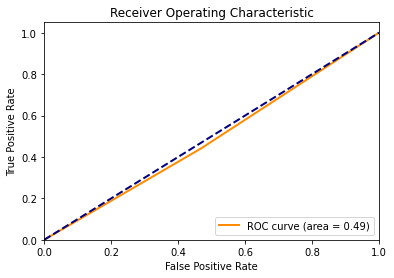

In [16]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [17]:
import io
import skimage
from skimage import data, io, filters
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature
import cv2 as cv
import numpy as np
import math
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from PIL import Image

imageList = []
label = ''
path = '/home/vlad/Desktop/prediction_set_2/'
dirList = os.listdir(path)
for i in dirList:
    image = Image.open(path + str(i))
    #plt.figure()
    #plt.imshow(image)
    print(f"Original size : {image.size}")
        
    image = image.resize((200, 200))
    print(f"New size : {image.size}")

    x = np.asarray(image)   
    x = np.expand_dims(x, axis=0)
    #print(x)
    images = np.vstack([x/255])
    #print(images[0])
    classes = model.predict(
    images,
    batch_size=None,
    verbose='auto',
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False)

    print(classes[0][0])
    if classes[0] < 0.5:
        print(i + " is a Near-Field Image")
        label = ['Near-Field']
    else:
        print(i + " is a Far-Field Image")
        label = ['Far-Field']
        
    #Plot the images with classification titles.
    imageList += label

Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 63ms/step
0.9442217
BTW2_2021-08-20 18:42:19.641.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
1.179091e-18
B12_2021-08-20 18:06:26.051.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 26ms/step
2.8487473e-14
A12_2021-08-20 18:18:45.453.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
1.0297489e-17
A12_2021-08-20 18:30:45.384.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 26ms/step
0.9999775
FE2_CP_2021-08-20 18:23:08.756.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 26ms/step
0.6035476
ATW2_2021-08-20 18:58:22.911.png is a Far-Field Ima

1/1 [==============================] - 0s 24ms/step
0.60227007
ATW2_2021-08-20 18:24:02.94.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
6.1523837e-18
B12_2021-08-20 18:40:45.388.png is a Near-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
9.102837e-18
FE2_S1_2021-08-20 17:57:25.35.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
1.3866944e-16
A12_2021-08-20 18:10:25.753.png is a Near-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
3.0870347e-18
FE2_S1_2021-08-20 18:52:06.344.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
6.7391175e-14
A12_2021-08-20 18:23:45.354.png is a Near-Field Image
Original size : (124, 99)
New size : 

1/1 [==============================] - 0s 25ms/step
2.9408925e-10
BTW1_2021-08-20 18:52:17.148.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 29ms/step
0.95201373
BTW2_2021-08-20 18:20:39.546.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
6.389032e-17
A12_2021-08-20 18:55:04.684.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
1.0
B11_2021-08-20 18:28:44.551.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 19ms/step
0.6120624
ATW2_2021-08-20 18:14:22.84.png is a Far-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
9.576298e-18
FE2_S1_2021-08-20 18:11:05.653.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 

1/1 [==============================] - 0s 23ms/step
0.6156922
ATW2_2021-08-20 18:56:23.010.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
6.0604434e-18
B12_2021-08-20 18:53:25.352.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 26ms/step
1.7140701e-17
A12_2021-08-20 18:54:04.684.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 26ms/step
0.61747247
ATW2_2021-08-20 18:53:23.010.png is a Far-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 28ms/step
1.1065054e-17
FE2_S1_2021-08-20 18:48:26.04.png is a Near-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 19ms/step
5.3848854e-18
FE2_S1_2021-08-20 18:03:45.555.png is a Near-Field Image
Original size : (128, 102)
New size : (

1/1 [==============================] - 0s 22ms/step
8.1847903e-19
B12_2021-08-20 18:40:25.388.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 30ms/step
0.99997026
FE2_CP_2021-08-20 18:06:08.552.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
2.801603e-18
B12_2021-08-20 18:43:05.289.png is a Near-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 25ms/step
2.5228535e-18
FE2_S1_2021-08-20 18:22:26.056.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
0.9999753
FE2_CP_2021-08-20 18:52:49.043.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
1.811053e-11
ATW1_2021-08-20 18:30:01.41.png is a Near-Field Image
Original size : (128, 102)
New size : 

1/1 [==============================] - 0s 22ms/step
1.7129908e-18
B12_2021-08-20 18:07:06.051.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
9.950614e-11
ATW1_2021-08-20 18:53:21.411.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
0.6270916
ATW2_2021-08-20 18:23:02.94.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
1.447148e-11
BTW1_2021-08-20 18:45:37.348.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
7.422303e-16
A12_2021-08-20 18:55:24.684.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
5.886664e-12
ATW1_2021-08-20 18:24:01.33.png is a Near-Field Image
Original size : (128, 102)
New size : (200

1/1 [==============================] - 0s 23ms/step
1.0
B11_2021-08-20 18:02:25.351.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
1.0
B11_2021-08-20 18:10:25.151.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
8.837925e-19
B12_2021-08-20 18:27:25.450.png is a Near-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
1.11765385e-17
FE2_S1_2021-08-20 18:08:05.753.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
0.9430874
BTW2_2021-08-20 18:57:19.948.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
0.999983
FE2_CP_2021-08-20 18:05:48.552.png is a Far-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [=========

1/1 [==============================] - 0s 23ms/step
1.0515415e-18
B12_2021-08-20 18:42:45.289.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
1.8655121e-14
A12_2021-08-20 18:09:05.753.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
0.9855617
BTW2_2021-08-20 18:53:20.049.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 19ms/step
1.1286877e-15
A12_2021-08-20 18:54:44.684.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
0.9999823
FE2_CP_2021-08-20 18:47:28.75.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
6.8429545e-19
B12_2021-08-20 18:22:25.551.png is a Near-Field Image
Original size : (128, 102)
New size : (200

1/1 [==============================] - 0s 22ms/step
4.5943296e-10
BTW1_2021-08-20 18:26:56.346.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
0.95389515
BTW2_2021-08-20 18:19:19.546.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
1.4346331e-10
BTW1_2021-08-20 18:49:37.148.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
1.0
ATW2_2021-08-20 19:01:23.232.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
8.577585e-12
ATW1_2021-08-20 18:38:01.555.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
0.99998283
FE2_CP_2021-08-20 18:42:28.542.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200

1.0
B11_2021-08-20 18:33:04.789.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
1.01531256e-10
ATW1_2021-08-20 18:22:01.44.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
1.9428735e-10
BTW1_2021-08-20 18:16:56.25.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
8.691996e-16
A12_2021-08-20 18:52:44.684.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
0.6030033
ATW2_2021-08-20 18:43:43.311.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
3.1743605e-10
BTW1_2021-08-20 18:55:37.049.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step
4.0537152e-18
FE2_S1_2021-08-20 18:17:25.552.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
8.847958e-16
A12_2021-08-20 18:36:45.184.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 19ms/step
4.6815392e-11
ATW1_2021-08-20 18:39:41.555.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
4.7098297e-12
ATW1_2021-08-20 18:48:01.611.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
0.9473838
BTW2_2021-08-20 18:21:59.447.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
2.005778e-18
B12_2021-08-20 18:14:25.851.png is a Near-Field Image
Original size : (128, 102)
New size 

1/1 [==============================] - 0s 24ms/step
2.5686592e-19
FE2_S1_2021-08-20 18:56:46.243.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
0.97186667
BTW2_2021-08-20 18:21:39.447.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
0.5952808
ATW2_2021-08-20 18:34:23.256.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
5.920163e-19
B12_2021-08-20 18:18:25.651.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
0.9711719
BTW2_2021-08-20 18:50:20.148.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 25ms/step
1.0
B11_2021-08-20 18:31:44.789.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [=

1/1 [==============================] - 0s 20ms/step
1.0
B11_2021-08-20 18:24:04.750.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
1.0
B11_2021-08-20 18:23:04.750.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
1.0
ATW1_2021-08-20 19:04:21.431.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
3.618496e-11
ATW1_2021-08-20 18:34:41.655.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
3.8437383e-18
B12_2021-08-20 18:16:45.750.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
2.4530347e-18
B12_2021-08-20 18:57:45.153.png is a Near-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============

1/1 [==============================] - 0s 22ms/step
0.98200256
BTW2_2021-08-20 18:57:59.948.png is a Far-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
6.370119e-18
FE2_S1_2021-08-20 18:11:25.653.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
2.6267873e-18
B12_2021-08-20 18:30:45.688.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
0.99996877
FE2_CP_2021-08-20 18:17:08.253.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
0.9999772
FE2_CP_2021-08-20 18:44:08.443.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
1.0
B11_2021-08-20 18:49:04.653.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/

1/1 [==============================] - 0s 21ms/step
1.0
B11_2021-08-20 18:50:04.653.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 25ms/step
0.59537786
ATW2_2021-08-20 18:55:23.010.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
0.9957272
BTW2_2021-08-20 18:43:59.943.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
0.9817852
BTW2_2021-08-20 18:28:59.246.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
1.09770725e-11
ATW1_2021-08-20 18:58:21.311.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
0.9398004
BTW2_2021-08-20 18:45:40.348.png is a Far-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [======

1/1 [==============================] - 0s 24ms/step
0.9999493
FE2_CP_2021-08-20 18:06:28.552.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
1.0
B11_2021-08-20 18:08:05.151.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 25ms/step
3.309012e-11
ATW1_2021-08-20 18:24:41.33.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
8.559159e-10
BTW1_2021-08-20 18:41:56.641.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
6.299371e-16
A12_2021-08-20 18:15:45.553.png is a Near-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
6.0329946e-18
FE2_S1_2021-08-20 18:43:25.842.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)

1/1 [==============================] - 0s 23ms/step
5.7732393e-18
FE2_S1_2021-08-20 18:18:05.453.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
0.9795286
BTW2_2021-08-20 18:49:40.148.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
0.99997294
FE2_CP_2021-08-20 18:13:08.352.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
0.63109404
ATW2_2021-08-20 18:55:43.010.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 19ms/step
3.5033226e-11
ATW1_2021-08-20 18:16:41.15.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
1.3130853e-10
BTW1_2021-08-20 18:22:36.447.png is a Near-Field Image
Original size : (128, 102)
New size : (

1/1 [==============================] - 0s 21ms/step
2.677309e-18
FE2_S1_2021-08-20 18:09:25.753.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
1.6138041e-18
B12_2021-08-20 18:41:05.289.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
0.5974456
ATW2_2021-08-20 18:27:02.83.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 19ms/step
1.6879749e-14
A12_2021-08-20 18:55:44.585.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
9.922482e-16
A12_2021-08-20 18:21:25.354.png is a Near-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
2.9450624e-18
FE2_S1_2021-08-20 18:43:05.842.png is a Near-Field Image
Original size : (128, 102)
New size :

1/1 [==============================] - 0s 20ms/step
1.0
B11_2021-08-20 18:06:05.250.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
3.1795042e-18
B12_2021-08-20 18:17:45.750.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
2.0947374e-10
BTW1_2021-08-20 18:31:36.147.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
0.99996424
FE2_CP_2021-08-20 18:49:08.75.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
1.2540782e-18
B12_2021-08-20 18:06:06.051.png is a Near-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
5.576076e-18
FE2_S1_2021-08-20 18:12:45.653.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 20

1/1 [==============================] - 0s 23ms/step
1.0
B11_2021-08-20 18:40:04.588.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
4.2465583e-13
A12_2021-08-20 18:11:45.654.png is a Near-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
7.447594e-18
FE2_S1_2021-08-20 18:51:46.344.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
1.0
B11_2021-08-20 18:10:45.151.png is a Far-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
9.548721e-18
FE2_S1_2021-08-20 18:31:25.756.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 27ms/step
1.0
B11_2021-08-20 18:52:04.552.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [============

1/1 [==============================] - 0s 23ms/step
3.6323806e-19
B12_2021-08-20 18:04:46.051.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
0.99995285
FE2_CP_2021-08-20 17:56:48.05.png is a Far-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
2.7630335e-18
FE2_S1_2021-08-20 17:59:05.25.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
7.125274e-18
B12_2021-08-20 18:30:05.688.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
3.443337e-18
B12_2021-08-20 18:09:45.950.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
4.7903663e-18
B12_2021-08-20 18:46:45.552.png is a Near-Field Image
Original size : (128, 102)
New size : 

1/1 [==============================] - 0s 21ms/step
1.0
B11_2021-08-20 18:05:25.250.png is a Far-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
5.0045056e-18
FE2_S1_2021-08-20 18:10:25.753.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
1.3599713e-17
B12_2021-08-20 18:15:45.750.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
0.9999377
FE2_CP_2021-08-20 18:46:08.84.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
7.604282e-11
ATW1_2021-08-20 18:56:01.411.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
0.5987758
ATW2_2021-08-20 18:45:03.311.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/

1/1 [==============================] - 0s 27ms/step
6.2678786e-11
ATW1_2021-08-20 18:11:40.953.png is a Near-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
4.593496e-18
FE2_S1_2021-08-20 18:08:25.753.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 18ms/step
4.8936194e-12
A12_2021-08-20 18:07:25.854.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
0.97448087
BTW2_2021-08-20 18:39:59.243.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
0.99995685
FE2_CP_2021-08-20 18:55:48.944.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
1.215214e-10
BTW1_2021-08-20 18:41:36.641.png is a Near-Field Image
Original size : (128, 102)
New size :

0.58499616
ATW2_2021-08-20 18:57:42.911.png is a Far-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 31ms/step
1.746964e-17
FE2_S1_2021-08-20 18:25:25.957.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 32ms/step
0.6311715
ATW2_2021-08-20 18:25:02.94.png is a Far-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 32ms/step
3.1547492e-18
FE2_S1_2021-08-20 18:00:05.25.png is a Near-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 25ms/step
8.537894e-18
FE2_S1_2021-08-20 18:12:05.653.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
1.6613143e-10
BTW1_2021-08-20 18:21:16.447.png is a Near-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 24ms/step
1.8411047e-17
B12_2021-08-20 18:50:45.453.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 26ms/step
0.9999668
FE2_CP_2021-08-20 18:09:48.453.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 33ms/step
3.3013335e-11
ATW1_2021-08-20 18:55:01.411.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 25ms/step
0.99997854
FE2_CP_2021-08-20 18:55:08.944.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
1.0
B11_2021-08-20 18:02:05.351.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
1.0
B11_2021-08-20 18:03:05.351.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [=====

2.2542108e-14
A12_2021-08-20 18:05:05.854.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
0.96434444
BTW2_2021-08-20 18:30:19.246.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
0.99997056
FE2_CP_2021-08-20 18:36:08.743.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 26ms/step
1.5010905e-13
A12_2021-08-20 18:56:04.585.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
0.9999832
FE2_CP_2021-08-20 18:41:08.542.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
6.3981576e-12
ATW1_2021-08-20 18:41:21.456.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 24ms/step
0.9999501
FE2_CP_2021-08-20 18:14:08.352.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
2.0589444e-10
BTW1_2021-08-20 18:28:36.246.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 25ms/step
8.2679247e-10
BTW1_2021-08-20 18:27:56.246.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 25ms/step
7.285148e-19
B12_2021-08-20 18:11:45.851.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
1.0
B11_2021-08-20 18:14:25.051.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
1.0
B11_2021-08-20 18:41:04.489.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [====

1/1 [==============================] - 0s 20ms/step
9.314937e-18
FE2_S1_2021-08-20 18:29:25.857.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 22ms/step
5.056438e-12
ATW1_2021-08-20 18:43:41.710.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 19ms/step
1.0
B11_2021-08-20 18:58:04.352.png is a Far-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
1.6938413e-18
FE2_S1_2021-08-20 18:43:45.842.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
0.6383773
ATW2_2021-08-20 18:49:03.210.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
1.5116398e-18
B12_2021-08-20 18:42:05.289.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 20

1/1 [==============================] - 0s 27ms/step
4.4536118e-11
BTW1_2021-08-20 18:30:16.246.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 25ms/step
5.114394e-19
B12_2021-08-20 18:51:05.352.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 29ms/step
0.95078105
BTW2_2021-08-20 18:44:59.943.png is a Far-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
4.3714536e-19
FE2_S1_2021-08-20 18:52:26.344.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 20ms/step
1.9332246e-11
BTW1_2021-08-20 18:51:37.148.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 29ms/step
5.8239254e-11
ATW1_2021-08-20 18:45:01.710.png is a Near-Field Image
Original size : (128, 102)
New siz

1/1 [==============================] - 0s 22ms/step
1.8533053e-10
BTW1_2021-08-20 18:15:56.25.png is a Near-Field Image
Original size : (124, 99)
New size : (200, 200)
1/1 [==============================] - 0s 24ms/step
1.0481738e-17
FE2_S1_2021-08-20 18:06:05.852.png is a Near-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
0.9999833
FE2_CP_2021-08-20 18:58:08.844.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 21ms/step
0.99998534
FE2_CP_2021-08-20 18:34:48.743.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 23ms/step
1.0
B11_2021-08-20 18:09:45.151.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1/1 [==============================] - 0s 26ms/step
0.96373993
BTW2_2021-08-20 18:55:00.049.png is a Far-Field Image
Original size : (128, 102)
New size : (200, 200)
1

In [24]:
nameList = []
index = 0
while index < len(dirList):
    if dirList[index][0:3] == 'B12':
        nameList += ['Near-Field']
    elif dirList[index][0:3] == 'B11':
        nameList += ['Far-Field']
    elif dirList[index][0:4] == 'ATW1':
        nameList += ['Near-Field']
    elif dirList[index][0:5] == 'FE2_C':
        nameList += ['Far-Field']
    elif dirList[index][0:5] == 'FE2_S':
        nameList += ['Near-Field']
    elif dirList[index][0:4] == 'BTW1':
        nameList += ['Near-Field']
    elif dirList[index][0:3] == 'A12':
        nameList += ['Near-Field']
    elif dirList[index][0:4] == 'ATW2':
        nameList += ['Far-Field']
    else:
        nameList += ['Far-Field']
    index += 1    

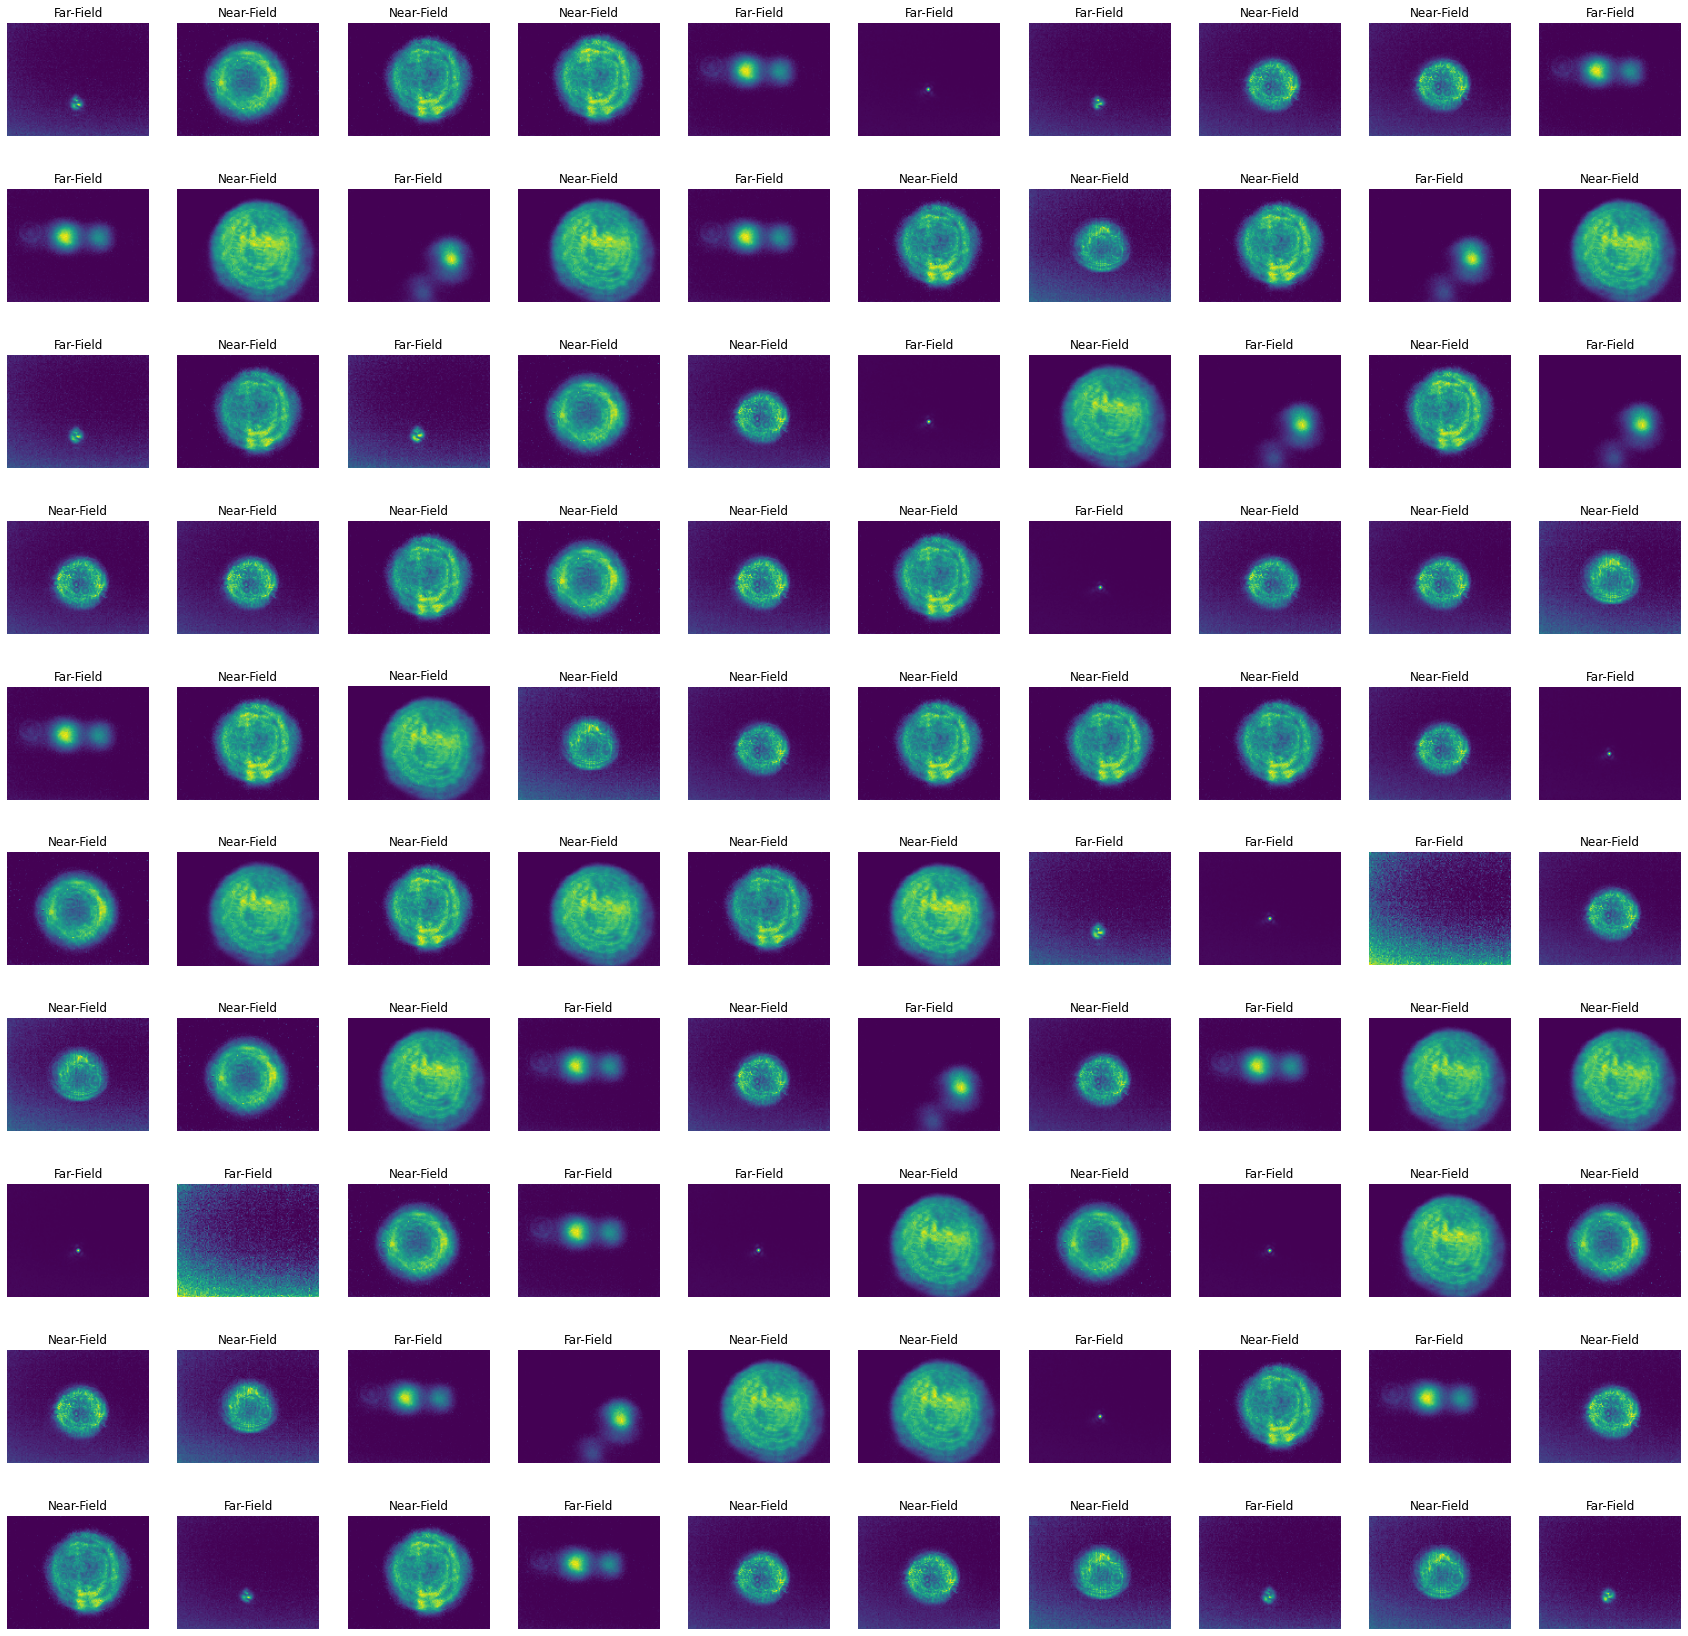

In [29]:
plt.figure(figsize=(30,30))
count = 0
for i in dirList[0:100]:
    image = Image.open(path + str(i))
    ax=plt.subplot(10,10,count+1)
    plt.imshow(image)
    plt.title(imageList[count])
    count += 1
    plt.axis('off')

In [25]:
from sklearn.metrics import confusion_matrix

y_true = nameList
y_pred = imageList
confusion_matrix(y_true, y_pred)

array([[660,   0],
       [ 23, 786]])

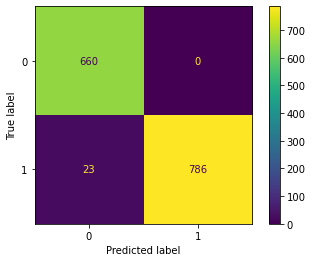

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

